In [1]:
import pandas as pd
Tcus=pd.read_csv('C:/Users/Ranjitha/Telco-Customer-Churn.csv')
Tcus.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
Tcus['is_churn']=Tcus['Churn'].map({'No':0,'Yes':1})

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import metrics
from sklearn.preprocessing import scale,LabelEncoder

In [8]:
#converting columns having numeric values to numeric datatype
Tcus = Tcus.convert_objects(convert_numeric=True)
Tcus.dtypes
#filling nll values with median 
Tcus.TotalCharges.fillna(value=Tcus.TotalCharges.median(),inplace='True')

C:\Users\Ranjitha\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [15]:
X=Tcus[['tenure','Contract','InternetService','TotalCharges']]
le = LabelEncoder()
for i in X.columns:
    if X[i].dtype=='object':
        le.fit(X[i])
        X[i]=le.transform(X[i])
X=scale(X)
#for i in X.columns:
#    if X[i].dtype == 'object':
#        le.fit(X[i])
#        X[i] = le.transform(x[i])
#X = scale(X)
y=Tcus['is_churn']


C:\Users\Ranjitha\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
print("coefficients for Logistic regression {}".format(lr.coef_))

coefficients for Logistic regression [[-2.22190985 -1.00976598 -0.10088311  1.81526841]]


In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score,jaccard_similarity_score
mse=mean_squared_error(y_test,Y_test,multioutput='uniform_average')
print("mse is {}".format(mse))
mae=mean_absolute_error(y_test,Y_test,multioutput='uniform_average')
print('mae is {}'.format(mae))
evs=explained_variance_score(y_test,Y_test,multioutput='uniform_average')
print("evs is {}".format(evs))
rsc=r2_score(y_test,Y_test)
print("r2 score is {}".format(rsc))
print("jaccard similarity is {}".format(jaccard_similarity_score(y_test,Y_test)))

mse is 0.20511000709723207
mae is 0.20511000709723207
evs is -0.08507480472770235
r2 score is -0.10284431299901398
jaccard similarity is 0.794889992902768


In [29]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve,auc
#confusion matrix
print(metrics.confusion_matrix(y_test,Y_test))

[[957 104]
 [185 163]]


In [31]:

print(metrics.classification_report(y_test,Y_test))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1061
          1       0.61      0.47      0.53       348

avg / total       0.78      0.79      0.79      1409



In [32]:
false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,Y_test)
roc_area=auc(false_positive_rate,true_positive_rate)
print("area under the curve is {}". format(roc_area))

area under the curve is 0.6851850347210938


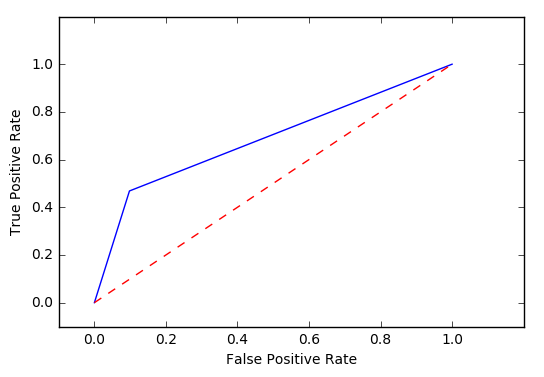

In [33]:
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC ' % roc_area)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
CVscore=cross_val_score(LogisticRegression(),X,y,cv=10)
print(CVscore)
print(CVscore.mean())


[ 0.78723404  0.78723404  0.76170213  0.76595745  0.78125     0.76278409
  0.80113636  0.76846591  0.76988636  0.80512091]
0.779077129723
